In [20]:
#Importamos librerias necesarias
import pandas as pd 
import seaborn
import matplotlib
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [21]:
df_eda=pd.read_csv(r'C:\Users\ignac\OneDrive\Escritorio\Proyecto Individual 1\HenryLabs-PIMLO\Data\dataset_modificado.csv')

In [22]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      20000 non-null  float64
 1   id                          20000 non-null  int64  
 2   original_language           20000 non-null  object 
 3   overview                    20000 non-null  object 
 4   popularity                  20000 non-null  float64
 5   release_date                20000 non-null  object 
 6   revenue                     20000 non-null  int64  
 7   runtime                     20000 non-null  float64
 8   status                      20000 non-null  object 
 9   title                       20000 non-null  object 
 10  vote_average                20000 non-null  float64
 11  vote_count                  20000 non-null  float64
 12  genres_name                 20000 non-null  object 
 13  companies_names             200

In [23]:
df_eda

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,genres_name,companies_names,spoken_languages_clean,production_countries_clean,name_collection,return,release_year,cast_clean,director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,...,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,English,United States of America,Toy Story Collection,12.451801,1995,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Jumanji,...,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...","English, Français",United States of America,0,4.043035,1995,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Grumpier Old Men,...,92.0,"Romance, Comedy","Warner Bros., Lancaster Gate",English,United States of America,Grumpy Old Men Collection,0.000000,1995,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Waiting to Exhale,...,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,English,United States of America,0,5.090760,1995,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Father of the Bride Part II,...,173.0,Comedy,"Sandollar Productions, Touchstone Pictures",English,United States of America,Father of the Bride Collection,0.000000,1995,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,86304,en,"Masked vigilantes Charge (Jason Trost), Cutthr...",5.928982,2011-10-26,0,78.0,Released,All Superheroes Must Die,...,14.0,"Science Fiction, Thriller",Grindfest,English,NaN,0,0.000000,2011,"Jason Trost, Lucas Till, James Remar, Sophie M...",Jason Trost
19996,0.0,288109,en,Part one of a BBC documentary about Jean Renoir.,0.000000,1993-11-17,0,60.0,Released,Jean Renoir: Part One - From La Belle Époque t...,...,0.0,Documentary,no register,"English, Français",United Kingdom,0,0.000000,1993,NaN,David Thompson
19997,0.0,105790,en,While filming a documentary in Mississippi in ...,0.327944,2012-04-27,0,90.0,Released,Booker's Place: A Mississippi Story,...,1.0,Documentary,no register,NaN,NaN,0,0.000000,2012,NaN,Raymond De Felitta
19998,0.0,98065,en,Girl Walk // All Day is a feature-length dance...,0.358534,2011-12-08,0,75.0,Released,Girl Walk // All Day,...,7.0,Music,no register,NaN,NaN,0,0.000000,2011,"Anne Marsen, Dai Omiya, John Doyle",Jacob Krupnick


In [24]:
df_eda.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,7.182149e+06,42323.947650,4.115877,1.867697e+07,101.249400,6.015405,169.424150,1.309365e+03,1987.433750
std,2.139393e+07,47639.497969,4.811145,7.649160e+07,30.926094,1.455757,589.035504,1.105793e+05,22.689278
min,0.000000e+00,2.000000,0.000000,-2.147484e+09,0.000000,0.000000,0.000000,-9.061112e+00,1893.000000
25%,0.000000e+00,12499.750000,0.813781,0.000000e+00,90.000000,5.500000,7.000000,0.000000e+00,1974.000000
50%,0.000000e+00,28641.000000,2.333837,0.000000e+00,99.000000,6.200000,21.000000,0.000000e+00,1996.000000
75%,1.300000e+06,52048.250000,6.477314,3.175712e+05,111.000000,6.900000,80.000000,0.000000e+00,2005.000000
max,3.800000e+08,449677.000000,185.070892,1.845034e+09,1140.000000,10.000000,14075.000000,1.239638e+07,2014.000000


In [25]:
# Buscamos valores validos
df_eda.isnull().sum()

budget                           0
id                               0
original_language                0
overview                         0
popularity                       0
release_date                     0
revenue                          0
runtime                          0
status                           0
title                            0
vote_average                     0
vote_count                       0
genres_name                      0
companies_names                  0
spoken_languages_clean         953
production_countries_clean    1587
name_collection                  0
return                           0
release_year                     0
cast_clean                     548
director                         0
dtype: int64

In [27]:
# Número total de valores en el dataframe
valores_total = df_eda.size
valores_total

420000

In [29]:
# Buscamos los valores únicos de "generos" 
df_eda['genres_name'].unique()

array(['Animation, Comedy, Family', 'Adventure, Fantasy, Family',
       'Romance, Comedy', ..., 'TV Movie, Comedy, Romance, Family',
       'Comedy, Music, TV Movie', 'Science Fiction, Thriller, Action'],
      dtype=object)

In [30]:
df_eda['release_date'].unique()

array(['1995-10-30', '1995-12-15', '1995-12-22', ..., '1948-07-24',
       '2012-09-24', '1993-11-17'], dtype=object)

In [33]:
# Buscamos datos que no correspondan. Y observamos que carece de datos invalidos.
datos_invalidos = df_eda[~pd.to_datetime(df_eda['release_date'], errors='coerce').notnull()]
datos_invalidos

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,genres_name,companies_names,spoken_languages_clean,production_countries_clean,name_collection,return,release_year,cast_clean,director


In [34]:
# Limpiamos el dataframe de caracteres raros
import re
# Caracteres permitidos
regex = re.compile(r'^[a-zA-Z0-9\s\.,\?!-]+$')

#filtrar el DataFrame
df_limpio = df_eda[df_eda['title'].apply(lambda x: bool(regex.match(x)))]

In [ ]:
# Filtramos el dataframe
df_limpio = df_eda[df_eda['title'].apply(lambda x: bool(regex.match(x)))]

In [36]:
# Verificamos el tamaño del dataframe
df_limpio.shape

(17441, 21)

Graficos

In [37]:
#Grafico de nube de palabras

# Concatenamos todos los textos en una sola cadena para text con titulos y text2 con generos
text = ','.join(df_eda['title'])
text.split(',')

text2 = ' '.join(df_eda['genres_name'])
text.split(',')

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'The American President',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'The City of Lost Children',
 'Shanghai Triad',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry',
 ' the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How To Make An American Quilt',
 'Se7en',
 'Pocahontas',
 'When Night Is Falling',
 'The Usual Suspects',
 'Guardian Angel',
 'Mighty Aphrodite',
 'Lamerica',
 'The Big Green',
 'Georgia',
 'Kids of 

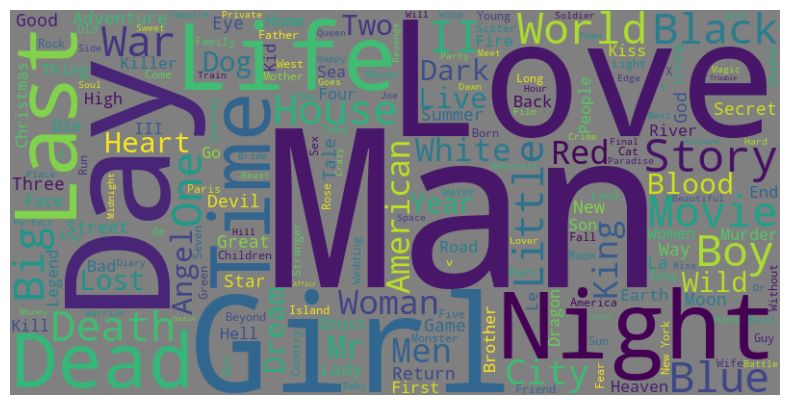

In [41]:
# Creamos la nube de palabras para "titulo"
wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se observa en el grafico que las palabras que mas se repiten son: DAY, MAN, LOVE, NIGHT, GIRL, LAST

In [ ]:
# Contamos cuantas veces se repiten

print(text.count('Day'))
print(text.count('Man'))
print(text.count('Love'))
print(text.count('Night'))
print(text.count('Girl'))
print(text.count('Last'))

212
438
332
224
199
155


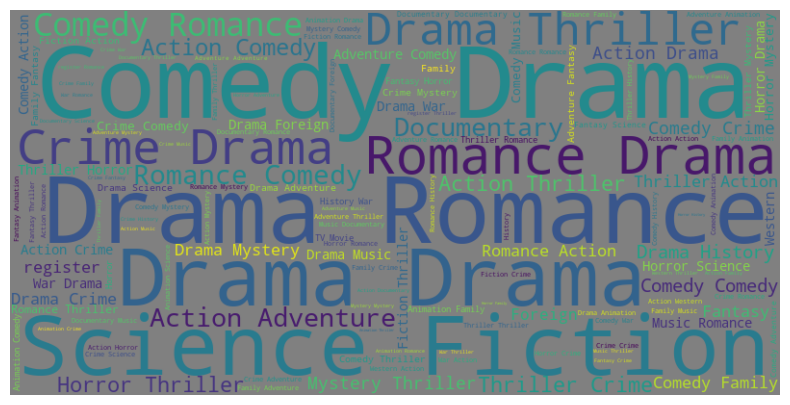

In [43]:
# Creamos la nube de palabras para "generos"
wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se observa que las palabras que mas se repiten son: COMEDY, DRAMA, ROMANCE, SCIENCE FICTION

In [44]:
# Contamos cuantas veces se repiten

print(text2.count('Comedy'))
print(text2.count('Drama'))
print(text2.count('Romance'))
print(text2.count('Science Fiction'))

6381
10618
3947
1441


Outliers

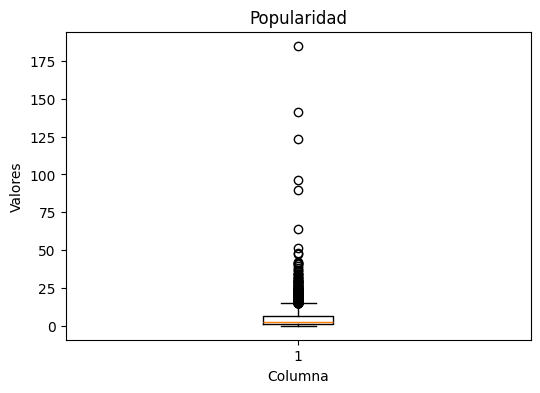

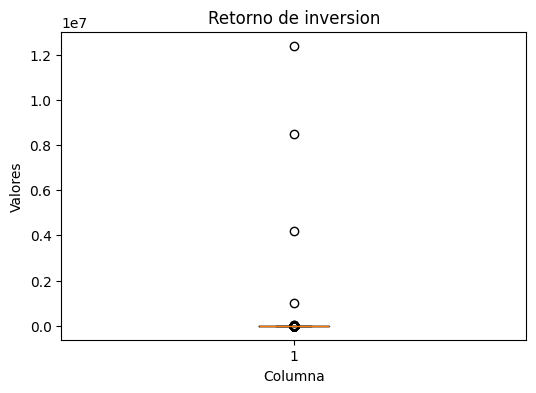

In [45]:
# Buscamos outliers

#popularity
plt.figure(figsize=(6, 4))
plt.boxplot(df_eda['popularity'])
plt.title('Popularidad')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.show()

#return
plt.figure(figsize=(6, 4))
plt.boxplot(df_eda['return'])
plt.title('Retorno de inversion')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.show()

In [46]:
# Buscamos el titulo de valor máximo en la columna 'popularity'
popularyty_max = df_eda.loc[df_eda['popularity'].idxmax()]['title']
popularyty_max

'Avatar'

In [47]:
# Buscamos el índice de valor máximo en la columna 'return'
popularyty_max = df_eda.loc[df_eda['return'].idxmax()]['title']
popularyty_max


'Less Than Zero'

Limpiamos del dataframe lo que no usaremos para el modelo de ML

In [50]:
# La columna "budget" tiene muchos valores 0, lo cual afecta a "return"

repet_cero = (df_eda['budget'] == 0.0).sum()
repet_cero

14056

In [ ]:
# La columna "name_collection" tiene muchos datos en 0,  por lo que no considero que podria ser de utilidad.

df_eda['name_collection'].str.count('0').sum()

17615

In [ ]:
# La columna "revenue" tiene muchos valores 0

contar_ceros =(df_eda['revenue'] == 0).sum()
contar_ceros

14483

In [52]:
df_eda['spoken_languages_clean'].isna().sum()

953

In [53]:
# Borramos columnas que considero no son de utilidad para mi modelo.

df_eda.drop(columns=['budget','id','release_date','status','runtime', 'production_countries_clean','revenue','spoken_languages_clean','vote_count','original_language','name_collection','return', 'release_year'], inplace=True)

In [54]:
df_eda.drop(columns=[ 'overview','popularity','vote_average','cast_clean'], inplace=True)

In [55]:
df_eda

,title,genres_name,companies_names,director
0,Toy Story,"Animation, Comedy, Family",Pixar Animation Studios,John Lasseter
1,Jumanji,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",Joe Johnston
2,Grumpier Old Men,"Romance, Comedy","Warner Bros., Lancaster Gate",Howard Deutch
3,Waiting to Exhale,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,Forest Whitaker
4,Father of the Bride Part II,Comedy,"Sandollar Productions, Touchstone Pictures",Charles Shyer
...,...,...,...,...
19995,All Superheroes Must Die,"Science Fiction, Thriller",Grindfest,Jason Trost
19996,Jean Renoir: Part One - From La Belle Époque t...,Documentary,no register,David Thompson
19997,Booker's Place: A Mississippi Story,Documentary,no register,Raymond De Felitta
19998,Girl Walk // All Day,Music,no register,Jacob Krupnick


In [56]:
# Pasamos valores de la columna "title" a minusculas

df_eda['title'] = df_eda['title'].apply(lambda x: x.lower())

In [57]:
# Tomaremos solo una muestra para el modelo y lo guardamos en un arcivo csv
modelo_muestra= df_eda.head(5000).to_csv('C:/Users/ignac/OneDrive/Escritorio/Proyecto Individual 1/HenryLabs-PIMLO/modelo_muestra.csv' , index=False, header=True)